<a href="https://colab.research.google.com/github/WalrusEggMan/intro-to-is/blob/master/task_buyers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==1.14
!pip install keras

     |████████████████████████████████| 377.0MB 38kB/s 
     |████████████████████████████████| 3.2MB 13.3MB/s 
     |████████████████████████████████| 491kB 38.0MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.14.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.14.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


1.14.0
   Obs No.  Buy  Income  ...  English  Prev Child Mag  Prev Parent Mag
0        1    0   24000  ...        0               0                0
1        2    1   75000  ...        1               1                0
2        3    0   46000  ...        1               0                0
3        4    1   70000  ...        1               1                0
4        5    0   43000  ...        1               0                1

[5 rows x 18 columns]
Epoch 1/8
450/450 [==============================] - 1s 2ms/step - loss: 0.5443 - acc: 0.7422
Epoch 2/8
450/450 [==============================] - 0s 1ms/step - loss: 0.3896 - acc: 0.8178
Epoch 3/8
450/450 [==============================] - 0s 1ms/step - loss: 0.3392 - acc: 0.8178
Epoch 4/8
450/450 [==============================] - 0s 1ms/step - loss: 0.2995 - acc: 0.8200
Epoch 5/8
450/450 [==============================] - 1s 1ms/step - loss: 0.2580 - acc: 0.8667
Epoch 6/8
450/450 [==============================] - 1s 1ms/step - loss: 0

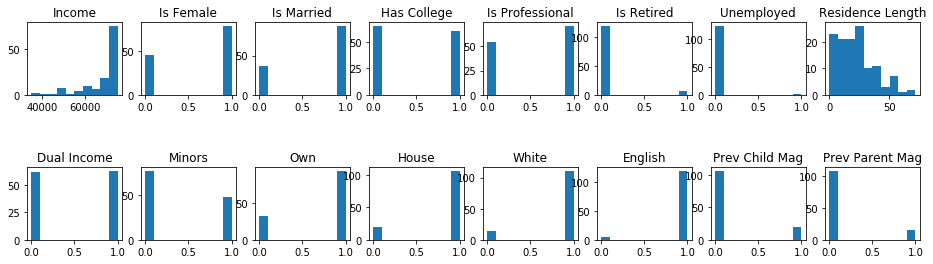

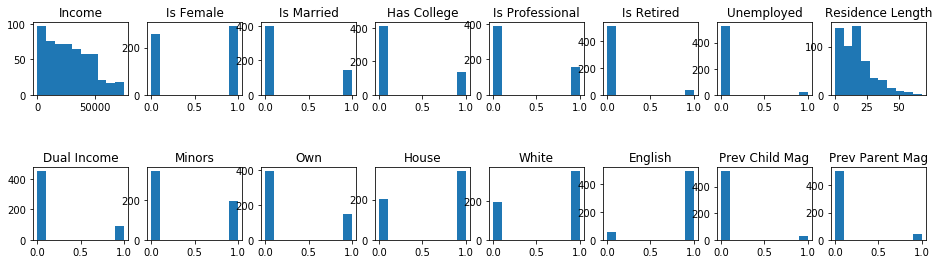

In [3]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

url = 'https://raw.githubusercontent.com/werowe/logisticRegressionBestModel/master/KidCreative.csv'

data = pd.read_csv(url, delimiter=',')
print(data.head())

labels=data['Buy']
features = data.iloc[:,2:16]
import numpy as np
from sklearn.model_selection import train_test_split

X=features
#ravel - category
y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(14,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=1, verbose=1)
y_pred = model.predict(X_test)

score = model.evaluate(X_test, y_test,verbose=1)

print(score)

df = pd.DataFrame(data, columns=np.array(data.columns))

buyers = df.loc[(df.Buy == 1)]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 8, figsize=(16, 4))

i = 0
j = 0

for c in buyers.columns[2:]:
    ax[j, i].hist(buyers[c])
    ax[j, i].set_title(c)
    i = i + 1
    if i == 8:
        j = 1
        i = 0

fig.subplots_adjust(hspace=1, wspace=0.2)
plt.show()

df = pd.DataFrame(data, columns=data.columns)

notbuyers = df.loc[(df.Buy == 0)]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 8, figsize=(16, 4))

i = 0
j = 0

for c in np.array(data.columns)[2:]:
    ax[j, i].hist(notbuyers[c])
    ax[j, i].set_title(c)
    i = i + 1
    if i == 8:
        j = 1
        i = 0

fig.subplots_adjust(hspace=1, wspace=0.2)
plt.show()